In [1]:
#Pkg.clone("https://github.com/henrikbostrom/RandomForest.git")
#Pkg.add("Convex")
#Pkg.add("ECOS");# Fit random forest regression models

In [58]:
using IJulia
IJulia.installkernel("Julia nodeps", "--depwarn=no")

INFO: Installing Julia nodeps kernelspec julia-nodeps-0.6
[InstallKernelSpec] Removing existing kernelspec in /Users/AlexLeong/Library/Jupyter/kernels/julia-nodeps-0.6
[InstallKernelSpec] Installed kernelspec julia-nodeps-0.6 in /Users/AlexLeong/Library/Jupyter/kernels/julia-nodeps-0.6


(`/Users/AlexLeong/.julia/v0.6/Conda/deps/usr/bin/jupyter kernelspec`, "julia-nodeps-0.6")

In [2]:
using RandomForest
using DataFrames
using ECOS
using PyPlot
using Convex
set_default_solver(ECOSSolver(verbose=0));

In [3]:
court_test = readtable("courtnewf_test.csv")
court_train = readtable("courtnewf_train.csv")
court_valid = readtable("courtnewf_valid.csv")

office_test = readtable("officenewf_test.csv")
office_train = readtable("officenewf_train.csv")
office_valid = readtable("officenewf_valid.csv")

school1_test = readtable("school1newf_test.csv")
school1_train = readtable("school1newf_train.csv")
school1_valid = readtable("school1newf_valid.csv")

school2_test = readtable("school2newf_test.csv")
school2_train = readtable("school2newf_train.csv")
school2_valid = readtable("school2newf_valid.csv");

# courthouse init

In [4]:
y_court_train = court_train[:Courthouse_y]
y_court_train = convert(Array, y_court_train)
X_court_train = court_train[1:19]
X_court_train = convert(Array,X_court_train)
reshape(y_court_train, 5227, 1)
reshape(X_court_train, 5227, 19)

y_court_valid = court_valid[:Courthouse_y]
y_court_valid = convert(Array, y_court_valid)
X_court_valid = court_valid[1:19]
X_court_valid = convert(Array,X_court_valid)
reshape(y_court_valid, 1742, 1)
reshape(X_court_valid, 1742, 19)

y_court_test = court_test[:Courthouse_y]
y_court_test = convert(Array, y_court_test)
X_court_test = court_test[1:19]
X_court_test = convert(Array,X_court_test)
reshape(y_court_test, 1741, 1)
reshape(X_court_test, 1741, 19)

X_court_train = [X_court_train[:,1:19];X_court_valid[:,1:19]]
y_court_train = [y_court_train[:];y_court_valid[:]];

# office init

In [5]:
y_office_train = office_train[:Office_y]
y_office_train = convert(Array, y_office_train)
X_office_train = office_train[1:19]
X_office_train = convert(Array,X_office_train)
reshape(y_office_train, 5227, 1)
reshape(X_office_train, 5227, 19)

y_office_valid = office_valid[:Office_y]
y_office_valid = convert(Array, y_office_valid)
X_office_valid = office_valid[1:19]
X_office_valid = convert(Array,X_office_valid)
reshape(y_office_valid, 1742, 1)
reshape(X_office_valid, 1742, 19)

y_office_test = office_test[:Office_y]
y_office_test = convert(Array, y_office_test)
X_office_test = office_test[1:19]
X_office_test = convert(Array,X_office_test)
reshape(y_office_test, 1741, 1)
reshape(X_office_test, 1741, 19)

X_office_train = [X_office_train[:,1:19];X_office_valid[:,1:19]]
y_office_train = [y_office_train[:];y_office_valid[:]];

# school1 init

In [6]:
y_school1_train = school1_train[:School1_y]
y_school1_train = convert(Array, y_school1_train)
X_school1_train = school1_train[1:19]
X_school1_train = convert(Array,X_school1_train)
reshape(y_school1_train, 5227, 1)
reshape(X_school1_train, 5227, 19)

y_school1_valid = school1_valid[:School1_y]
y_school1_valid = convert(Array, y_school1_valid)
X_school1_valid = school1_valid[1:19]
X_school1_valid = convert(Array,X_school1_valid)
reshape(y_school1_valid, 1742, 1)
reshape(X_school1_valid, 1742, 19)

y_school1_test = school1_test[:School1_y]
y_school1_test = convert(Array, y_school1_test)
X_school1_test = school1_test[1:19]
X_school1_test = convert(Array,X_school1_test)
reshape(y_school1_test, 1741, 1)
reshape(X_school1_test, 1741, 19)

X_school1_train = [X_school1_train[:,1:19];X_school1_valid[:,1:19]]
y_school1_train = [y_school1_train[:];y_school1_valid[:]];

# school2 init

In [7]:
y_school2_train = school2_train[:School2_y]
y_school2_train = convert(Array, y_school2_train)
X_school2_train = school2_train[1:19]
X_school2_train = convert(Array,X_school2_train)
reshape(y_school2_train, 5227, 1)
reshape(X_school2_train, 5227, 19)

y_school2_valid = school2_valid[:School2_y]
y_school2_valid = convert(Array, y_school2_valid)
X_school2_valid = school2_valid[1:19]
X_school2_valid = convert(Array,X_school2_valid)
reshape(y_school2_valid, 1742, 1)
reshape(X_school2_valid, 1742, 19)

y_school2_test = school2_test[:School2_y]
y_school2_test = convert(Array, y_school2_test)
X_school2_test = school2_test[1:19]
X_school2_test = convert(Array,X_school2_test)
reshape(y_school2_test, 1741, 1)
reshape(X_school2_test, 1741, 19)

X_school2_train = [X_school2_train[:,1:19];X_school2_valid[:,1:19]]
y_school2_train = [y_school2_train[:];y_school2_valid[:]];

In [8]:
# Accuracy determination

function accuracy(yPred, yTrue)
    lenY = length(yTrue)
    numCorrect = 0
    
    for i = 1:lenY
        if (abs(yPred[i] - yTrue[i])/yTrue[i]) <= 0.1
            numCorrect += 1
        end
    end
    return numCorrect/lenY
end

accuracy (generic function with 1 method)

# Fit random forest regression model on court

In [9]:
court_forest = forestRegressor(notrees = 200)
RandomForest.fit!(court_forest, X_court_train, y_court_train)
describe_model(court_forest)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:26
 [5] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Float64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[9], in expression 

Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 200, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Array{Float64,1}}, ::Int64) at ./deprecated.jl:57
 [3] #generate_trees#87(::DataFrames.DataFrame, ::Array{Any,1}, ::Bool, ::Function, ::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:96
 [4] generate_trees(::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:89
 [5] broadcast_t(::Function, ::Type{Any}, ::Tuple{Base.OneTo{Int64}}, ::CartesianRange{CartesianIndex{1}}, ::Array{Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64},1}) at ./broadcast.jl:256
 [6] broadcast_c at ./broadcast.jl:319 [inlined]
 [7] broadcast(::Function, ::Array{Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64},1}) at ./broadcast.jl:434
 [8] #generate_model#267(::R

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Array}, ::Int64) at ./deprecated.jl:57
 [3] transform_nonmissing_columns_to_arrays(::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Symbol,1}, ::DataFrames.DataFrame, ::Array{Array{Int64,1},1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:145
 [4] #generate_trees#87(::DataFrames.DataFrame, ::Array{Any,1}, ::Bool, ::Function, ::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:106
 [5] generate_trees(::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:89
 [6] broadcast_t(::Function, ::Type{Any}, ::Tuple{Base.OneTo{Int64}}, ::CartesianRange{CartesianIndex{1}}, ::Array{Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64},1}) at ./broadcast.jl:25

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ~(::Array{Bool,1}) at ./deprecated.jl:57
 [3] #generate_tree#88(::Bool, ::Function, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::Array{Array{Float64,1},1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:204
 [4] (::RandomForest.#kw##generate_tree)(::Array{Any,1}, ::RandomForest.#generate_tree, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::Array{Array{Float64,1},1}) at ./<missing>:0
 [5] #generate_trees#87(::DataFrames.DataFrame, ::Array{Any,1}, ::Bool, ::Function, ::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64}) at /Users/AlexLeong/.julia/v0.6/RandomF

Generated by: RandomForest v. 0.0.11
Prediction task: regression
Learning method:
	learningType = RandomForest.Regressor()
	modeltype = forest
	notrees = 200
	split = default
	minleaf = 1
	maxdepth = 0
	randsub = default
	randval = true
	splitsample = 0
	bagging = true
	bagsize = 1.0
	modpred = false
	laplace = false
	confidence = 0.95
	conformal = default
OOB MSE: 3744.4038376560443
Variable importance:
x2	0.6645380528576248
x14	0.06809547599825981
x5	0.048464823676757106
x16	0.04090841366867604
x8	0.033575155198580946
x11	0.02732533552850223
x10	0.02249918629822493
x15	0.01557086580056788
x13	0.014088354927231398
x3	0.01276017693353819
x4	0.011037756512998083
x17	0.008797803906510053
x6	0.0067966005269630096
x19	0.006364749825993339
x7	0.006242626474731787
x12	0.005743580522773086
x9	0.004834069046745865
x18	0.0023569722953210087
x1	0.0


# check RMSE/NRMSE of court model

In [60]:
yp_court_train = RandomForest.predict(court_forest, X_court_train)
yp_court_test = RandomForest.predict(court_forest, X_court_test)

court_MSE_train = sum((yp_court_train - y_court_train).^2)/length(y_court_train)
court_MSE_test = sum((yp_court_test - y_court_test).^2)/length(y_court_test)


#y_court_train_min = minimum(y_court_train)
#y_court_test_min = minimum(y_court_test)
#y_court_train_max = maximum(y_court_train)
#y_court_test_max = maximum(y_court_test)

#y_court_train_mean = mean(y_court_train)
#y_court_test_mean = mean(y_court_test)

#court_NRMSE1_train = RMSE_train / (y_court_train_max - y_court_train_min)
#court_NRMSE1_test = RMSE_test / (y_court_test_max - y_court_test_min)


#court_NRMSE2_train = RMSE_train / (y_court_train_mean)
#court_NRMSE2_test =  RMSE_test / (y_court_test_mean)


#@show MSE_train
@show court_RMSE_train = court_MSE_train^(1/2)
#@show MSE_test
@show court_RMSE_test = court_MSE_test^(1/2)
@show accuracy(y_court_train, yp_court_train)
@show accuracy(y_court_test, yp_court_test)



#@show court_NRMSE1_train
#@show court_NRMSE1_test
#@show court_NRMSE2_train
#@show court_NRMSE2_test

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:58
 [5] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[60], i

 [5] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [6] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [7] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [8] include_string(::String, ::String) at ./loading.jl:515
 [9] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [10] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [11] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [12] (::IJulia.##14#17)() at ./task.jl:335
while loading In[60], in expression starting on line 1
Stacktrace

 [7] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [8] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [9] include_string(::String, ::String) at ./loading.jl:515
 [10] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [11] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [12] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [13] (::IJulia.##14#17)() at ./task.jl:335
while loading In[60], in expression starting on line 2
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] apply_trees(::Tuple{RandomForest.LearningMethod{Rando

court_RMSE_train = court_MSE_train ^ (1 / 2) = 31.28628702542373
court_RMSE_test = court_MSE_test ^ (1 / 2) = 59.65063702384268
accuracy(y_court_train, yp_court_train) = 0.9220835126990959
accuracy(y_court_test, yp_court_test) = 0.8144744399770247


Array{T}(::Type{T}, m::Int) is deprecated, use Array{T}(m) instead.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Tuple}, ::Int64) at ./deprecated.jl:57
 [3] #apply_model_internal#91(::Float64, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:545
 [4] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [5] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [6] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at

0.8144744399770247

# Fit random forest regression model on office

In [11]:
office_forest = forestRegressor(notrees=200, maxdepth=0)
RandomForest.fit!(office_forest, X_office_train, y_office_train)
describe_model(office_forest)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:26
 [5] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Int64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[11], in expression s

Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 200, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)



 [12] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Int64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [13] include_string(::String, ::String) at ./loading.jl:515
 [14] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [15] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [16] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [17] (::IJulia.##14#17)() at ./task.jl:335
while loading In[11], in expression starting on line 2
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Array}, ::Int64) at ./deprecated.jl:57
 [3] transform_nonmissing_columns_to_arrays(::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Symbol,1}, ::DataFrames.DataFrame, ::Array{Array{Int64,1},1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ~(::Array{Bool,1}) at ./deprecated.jl:57
 [3] #generate_tree#88(::Bool, ::Function, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Int64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::Array{Array{Float64,1},1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:204
 [4] (::RandomForest.#kw##generate_tree)(::Array{Any,1}, ::RandomForest.#generate_tree, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Int64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::Array{Array{Float64,1},1}) at ./<missing>:0
 [5] #generate_trees#87(::DataFrames.DataFrame, ::Array{Any,1}, ::Bool, ::Function, ::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64}) at /Users/AlexLeong/.julia/v0.6/RandomFores

Generated by: RandomForest v. 0.0.11
Prediction task: regression
Learning method:
	learningType = RandomForest.Regressor()
	modeltype = forest
	notrees = 200
	split = default
	minleaf = 1
	maxdepth = 0
	randsub = default
	randval = true
	splitsample = 0
	bagging = true
	bagsize = 1.0
	modpred = false
	laplace = false
	confidence = 0.95
	conformal = default
OOB MSE: 417.29611770968427
Variable importance:
x2	0.5152195007346856
x8	0.12136619169226287
x16	0.0985358622987766
x10	0.04821393556043588
x14	0.04578118006710457
x5	0.04360809097700507
x15	0.02916103258901829
x13	0.02290868517745242
x11	0.018425115436348526
x9	0.009977222399047705
x4	0.009329761104517961
x12	0.00887806492956488
x3	0.007939445689401765
x17	0.005858211032046114
x7	0.004568307039085745
x6	0.0044567471363513985
x19	0.004216977479056946
x18	0.0015556686578376505
x1	0.0


# check RMSE/NRMSE of office model

In [12]:
yp_office_train = RandomForest.predict(office_forest, X_office_train)
yp_office_test = RandomForest.predict(office_forest, X_office_test)

office_MSE_train = sum((yp_office_train - y_office_train).^2)/length(y_office_train)
office_MSE_test = sum((yp_office_test - y_office_test).^2)/length(y_office_test)


#y_office_train_min = minimum(y_office_train)
#y_office_test_min = minimum(y_office_test)
#y_office_train_max = maximum(y_office_train)
#y_office_test_max = maximum(y_office_test)

#y_office_train_mean = mean(y_office_train)
#y_office_test_mean = mean(y_office_test)

#office_NRMSE1_train = RMSE_train / (y_office_train_max - y_office_train_min)
#office_NRMSE1_test = RMSE_test / (y_office_test_max - y_office_test_min)


#office_NRMSE2_train = RMSE_train / (y_office_train_mean)
#office_NRMSE2_test =  RMSE_test / (y_office_test_mean)


#@show MSE_train
@show office_RMSE_train = office_MSE_train^(1/2)
#@show MSE_test
@show office_RMSE_test = office_MSE_test^(1/2)
@show accuracy(y_office_train, yp_office_train)
@show accuracy(y_office_test, yp_office_test)



#@show office_NRMSE1_train
#@show office_NRMSE1_test
#@show office_NRMSE2_train
#@show office_NRMSE2_test

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:58
 [5] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[12], i

 [5] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [6] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [7] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [8] include_string(::String, ::String) at ./loading.jl:515
 [9] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [10] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [11] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [12] (::IJulia.##14#17)() at ./task.jl:335
while loading In[12], in expression starting on line 1
Stacktrace

 [8] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [9] include_string(::String, ::String) at ./loading.jl:515
 [10] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [11] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [12] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [13] (::IJulia.##14#17)() at ./task.jl:335
while loading In[12], in expression starting on line 2
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] apply_trees(::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Any,1},Array{RandomForest.TreeNode,1}}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:580
 [4] #apply_model_internal#91(::Float64, ::Function, ::Ra

office_RMSE_train = office_MSE_train ^ (1 / 2) = 9.002622745974675
office_RMSE_test = office_MSE_test ^ (1 / 2) = 20.74979072748292


Array{T}(::Type{T}, m::Int) is deprecated, use Array{T}(m) instead.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Tuple}, ::Int64) at ./deprecated.jl:57
 [3] #apply_model_internal#91(::Float64, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:545
 [4] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [5] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [6] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at

accuracy(y_office_train, yp_office_train) = 0.998278088678433
accuracy(y_office_test, yp_office_test) = 0.9672601952900631


0.9672601952900631

# Fit random forest regression model on school1

In [13]:
school1_forest = forestRegressor(notrees=200, maxdepth=0)
RandomForest.fit!(school1_forest, X_school1_train, y_school1_train)
describe_model(school1_forest)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:26
 [5] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Int64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[13], in expression s

 [11] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:27
 [12] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Int64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [13] include_string(::String, ::String) at ./loading.jl:515
 [14] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [15] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [16] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [17] (::IJulia.##14#17)() at ./task.jl:335
while loading In[13], in expression starting on line 2
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Array}, ::Int64) at ./deprecated.jl:57
 [3] transform_nonmissing_columns_to_arrays(::RandomForest.LearningMeth

Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 200, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)



while loading In[13], in expression starting on line 2
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ~(::Array{Bool,1}) at ./deprecated.jl:57
 [3] #generate_tree#88(::Bool, ::Function, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Int64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::Array{Array{Float64,1},1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:204
 [4] (::RandomForest.#kw##generate_tree)(::Array{Any,1}, ::RandomForest.#generate_tree, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Int64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::Array{Array{Float64,1},1}) at ./<missing>:0
 [5] #generate_trees#87(::DataFrames.DataFrame, ::Array{Any,1}, ::Bool, ::Function, ::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},I

Generated by: RandomForest v. 0.0.11
Prediction task: regression
Learning method:
	learningType = RandomForest.Regressor()
	modeltype = forest
	notrees = 200
	split = default
	minleaf = 1
	maxdepth = 0
	randsub = default
	randval = true
	splitsample = 0
	bagging = true
	bagsize = 1.0
	modpred = false
	laplace = false
	confidence = 0.95
	conformal = default
OOB MSE: 434.2978673728333
Variable importance:
x2	0.4981265681961256
x8	0.12314886694872328
x14	0.07167892843558969
x16	0.06888054027828619
x5	0.0441727494834696
x15	0.041069532992518816
x10	0.031098290868443564
x13	0.026167527461680194
x11	0.02514962162849881
x17	0.01617364487732331
x9	0.012554989263505822
x19	0.011748505682501105
x12	0.007203244850946493
x7	0.006164729528363936
x6	0.005169356097315225
x4	0.00432452269576514
x3	0.0039962646234580745
x18	0.0031721160874853055
x1	0.0


# check RMSE/NRMSE of school1 model

In [57]:
yp_school1_train = RandomForest.predict(school1_forest, X_school1_train)
yp_school1_test = RandomForest.predict(school1_forest, X_school1_test)

school1_MSE_train = sum((yp_school1_train - y_school1_train).^2)/length(y_school1_train)
school1_MSE_test = sum((yp_school1_test - y_school1_test).^2)/length(y_school1_test)


#y_school1_train_min = minimum(y_school1_train)
#y_school1_test_min = minimum(y_school1_test)
#y_school1_train_max = maximum(y_school1_train)
#y_school1_test_max = maximum(y_school1_test)

#y_school1_train_mean = mean(y_school1_train)
#y_school1_test_mean = mean(y_school1_test)

#school1_NRMSE1_train = RMSE_train / (y_school1_train_max - y_school1_train_min)
#school1_NRMSE1_test = RMSE_test / (y_school1_test_max - y_school1_test_min)


#school1_NRMSE2_train = RMSE_train / (y_school1_train_mean)
#school1_NRMSE2_test =  RMSE_test / (y_school1_test_mean)


#@show MSE_train
@show school1_RMSE_train = school1_MSE_train^(1/2)
#@show MSE_test
@show school1_RMSE_test = school1_MSE_test^(1/2)
@show accuracy(y_school1_train, yp_school1_train)
@show accuracy(y_school1_test, yp_school1_test)



#@show school1_NRMSE1_train
#@show school1_NRMSE1_test
#@show school1_NRMSE2_train
#@show school1_NRMSE2_test

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:58
 [5] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[57], i

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Tuple}, ::Int64) at ./deprecated.jl:57
 [3] #apply_model_internal#91(::Float64, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:545
 [4] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [5] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [6] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [9] execute_

 [7] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [8] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [9] include_string(::String, ::String) at ./loading.jl:515
 [10] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [11] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [12] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [13] (::IJulia.##14#17)() at ./task.jl:335
while loading In[57], in expression starting on line 2
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] apply_trees(::Tuple{RandomForest.LearningMethod{Rando

school1_RMSE_train = school1_MSE_train ^ (1 / 2) = 9.03620100799716
school1_RMSE_test = school1_MSE_test ^ (1 / 2) = 20.454527040522912
accuracy(y_school1_train, yp_school1_train) = 0.9565217391304348
accuracy(y_school1_test, yp_school1_test) = 0.8265364732912119


Array{T}(::Type{T}, m::Int) is deprecated, use Array{T}(m) instead.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Tuple}, ::Int64) at ./deprecated.jl:57
 [3] #apply_model_internal#91(::Float64, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:545
 [4] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [5] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [6] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at

0.8265364732912119

# Fit random forest regression model on school2

In [15]:
school2_forest = forestRegressor(notrees=200, maxdepth=0)
RandomForest.fit!(school2_forest, X_school2_train, y_school2_train)
describe_model(school2_forest)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:26
 [5] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Int64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[15], in expression s

Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 200, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)



 [12] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Int64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [13] include_string(::String, ::String) at ./loading.jl:515
 [14] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [15] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [16] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [17] (::IJulia.##14#17)() at ./task.jl:335
while loading In[15], in expression starting on line 2
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Array}, ::Int64) at ./deprecated.jl:57
 [3] transform_nonmissing_columns_to_arrays(::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Symbol,1}, ::DataFrames.DataFrame, ::Array{Array{Int64,1},1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ~(::Array{Bool,1}) at ./deprecated.jl:57
 [3] #generate_tree#88(::Bool, ::Function, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Int64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::Array{Array{Float64,1},1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:204
 [4] (::RandomForest.#kw##generate_tree)(::Array{Any,1}, ::RandomForest.#generate_tree, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Int64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::Array{Array{Float64,1},1}) at ./<missing>:0
 [5] #generate_trees#87(::DataFrames.DataFrame, ::Array{Any,1}, ::Bool, ::Function, ::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Int64,1},Int64,Int64}) at /Users/AlexLeong/.julia/v0.6/RandomFores

Generated by: RandomForest v. 0.0.11
Prediction task: regression
Learning method:
	learningType = RandomForest.Regressor()
	modeltype = forest
	notrees = 200
	split = default
	minleaf = 1
	maxdepth = 0
	randsub = default
	randval = true
	splitsample = 0
	bagging = true
	bagsize = 1.0
	modpred = false
	laplace = false
	confidence = 0.95
	conformal = default
OOB MSE: 890.0678124987846
Variable importance:
x2	0.5365628470865982
x14	0.1032121192149776
x8	0.07668275364599561
x16	0.06139012469541706
x5	0.04118737822195737
x10	0.03621767249380694
x13	0.028604612685048447
x15	0.024170016455496383
x11	0.015949774520748985
x7	0.015031699448574309
x12	0.013837138069450396
x17	0.010764338699438141
x4	0.008835634563801454
x19	0.008081572568339315
x3	0.007708020770509278
x9	0.0050354011101539685
x6	0.004031508087783418
x18	0.0026973876619031134
x1	0.0


# check RMSE/NRMSE of school2 model

In [16]:
yp_school2_train = RandomForest.predict(school2_forest, X_school2_train)
yp_school2_test = RandomForest.predict(school2_forest, X_school2_test)

school2_MSE_train = sum((yp_school2_train - y_school2_train).^2)/length(y_school2_train)
school2_MSE_test = sum((yp_school2_test - y_school2_test).^2)/length(y_school2_test)


#y_school2_train_min = minimum(y_school2_train)
#y_school2_test_min = minimum(y_school2_test)
#y_school2_train_max = maximum(y_school2_train)
#y_school2_test_max = maximum(y_school2_test)

#y_school2_train_mean = mean(y_school2_train)
#y_school2_test_mean = mean(y_school2_test)

#school2_NRMSE1_train = RMSE_train / (y_school2_train_max - y_school2_train_min)
#school2_NRMSE1_test = RMSE_test / (y_school2_test_max - y_school2_test_min)


#school2_NRMSE2_train = RMSE_train / (y_school2_train_mean)
#school2_NRMSE2_test =  RMSE_test / (y_school2_test_mean)


#@show MSE_train
@show school2_RMSE_train = school2_MSE_train^(1/2)
#@show MSE_test
@show school2_RMSE_test = school2_MSE_test^(1/2)
@show accuracy(y_school2_train, yp_school2_train)
@show accuracy(y_school2_test, yp_school2_test)



#@show school2_NRMSE1_train
#@show school2_NRMSE1_test
#@show school2_NRMSE2_train
#@show school2_NRMSE2_test

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:58
 [5] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[16], i

 [5] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [6] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [7] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [8] include_string(::String, ::String) at ./loading.jl:515
 [9] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [10] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [11] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [12] (::IJulia.##14#17)() at ./task.jl:335
while loading In[16], in expression starting on line 1
Stacktrace

 [8] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [9] include_string(::String, ::String) at ./loading.jl:515
 [10] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [11] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [12] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [13] (::IJulia.##14#17)() at ./task.jl:335
while loading In[16], in expression starting on line 2
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] apply_trees(::Tuple{RandomForest.LearningMethod{RandomForest.Regressor},Array{Any,1},Array{RandomForest.TreeNode,1}}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:580
 [4] #apply_model_internal#91(::Float64, ::Function, ::Ra

school2_RMSE_train = school2_MSE_train ^ (1 / 2) = 13.033449407404675
school2_RMSE_test = school2_MSE_test ^ (1 / 2) = 29.6356853912629
accuracy(y_school2_train, yp_school2_train) = 0.9329889510690199
accuracy(y_school2_test, yp_school2_test) = 0.7920735209649626


Array{T}(::Type{T}, m::Int) is deprecated, use Array{T}(m) instead.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Tuple}, ::Int64) at ./deprecated.jl:57
 [3] #apply_model_internal#91(::Float64, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:545
 [4] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [5] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [6] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at

0.7920735209649626

# do models generalize to each others' data?

In [17]:
# School1 model to predict school2 data

school1_on_school2 = RandomForest.predict(school1_forest, X_school2_test)
@show RMSE_s1_s2 = sum(((school1_on_school2 - y_school2_test).^2)/length(y_school2_test))^(1/2)
@show accuracy(school1_on_school2, y_school2_test)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:58
 [5] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[17], i

 [5] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [6] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [7] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [8] include_string(::String, ::String) at ./loading.jl:515
 [9] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [10] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [11] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [12] (::IJulia.##14#17)() at ./task.jl:335
while loading In[17], in expression starting on line 3
Stacktrace

RMSE_s1_s2 = sum((school1_on_school2 - y_school2_test) .^ 2 / length(y_school2_test)) ^ (1 / 2) = 97.79540222565609
accuracy(school1_on_school2, y_school2_test) = 0.20792647903503733


 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Tuple}, ::Int64) at ./deprecated.jl:57
 [3] #apply_model_internal#91(::Float64, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:545
 [4] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [5] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [6] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [9] execute_request(::ZM

0.20792647903503733

In [18]:
# School2 model to predict school1 data

school2_on_school1 = RandomForest.predict(school2_forest, X_school1_test)
@show RMSE_s2_s1 = sum(((school2_on_school1 - y_school1_test).^2)/length(y_school1_test))^(1/2)
@show accuracy(school2_on_school1, y_school1_test)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:58
 [5] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[18], i

 [5] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [6] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [7] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [8] include_string(::String, ::String) at ./loading.jl:515
 [9] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [10] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [11] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [12] (::IJulia.##14#17)() at ./task.jl:335
while loading In[18], in expression starting on line 3
Stacktrace

RMSE_s2_s1 = sum((school2_on_school1 - y_school1_test) .^ 2 / length(y_school1_test)) ^ (1 / 2) = 85.12385590708772
accuracy(school2_on_school1, y_school1_test) = 0.10913268236645605


 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Tuple}, ::Int64) at ./deprecated.jl:57
 [3] #apply_model_internal#91(::Float64, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:545
 [4] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [5] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [6] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [9] execute_request(::ZM

0.10913268236645605

In [19]:
@show court_RMSE_train = court_MSE_train^(1/2)
@show court_RMSE_test = court_MSE_test^(1/2)
@show accuracy(y_court_train, yp_court_train)
@show accuracy(y_court_test, yp_court_test)

@show office_RMSE_train = office_MSE_train^(1/2)
@show office_RMSE_test = office_MSE_test^(1/2)
@show accuracy(y_office_train, yp_office_train)
@show accuracy(y_office_test, yp_office_test)

@show school1_RMSE_train = school1_MSE_train^(1/2)
@show school1_RMSE_test = school1_MSE_test^(1/2)
@show accuracy(y_school1_train, yp_school1_train)
@show accuracy(y_school1_test, yp_school1_test)

@show school2_RMSE_train = school2_MSE_train^(1/2)
@show school2_RMSE_test = school2_MSE_test^(1/2)
@show accuracy(y_school2_train, yp_school2_train)
@show accuracy(y_school2_test, yp_school2_test)

court_RMSE_train = court_MSE_train ^ (1 / 2) = 26.73629709422231
court_RMSE_test = court_MSE_test ^ (1 / 2) = 56.04603994750592
accuracy(y_court_train, yp_court_train) = 0.9387286554742431
accuracy(y_court_test, yp_court_test) = 0.8225157955198162
office_RMSE_train = office_MSE_train ^ (1 / 2) = 9.002622745974675
office_RMSE_test = office_MSE_test ^ (1 / 2) = 20.74979072748292
accuracy(y_office_train, yp_office_train) = 0.998278088678433
accuracy(y_office_test, yp_office_test) = 0.9672601952900631
school1_RMSE_train = school1_MSE_train ^ (1 / 2) = 9.03620100799716
school1_RMSE_test = school1_MSE_test ^ (1 / 2) = 20.454527040522912
accuracy(y_school1_train, yp_school1_train) = 0.9565217391304348
accuracy(y_school1_test, yp_school1_test) = 0.8265364732912119
school2_RMSE_train = school2_MSE_train ^ (1 / 2) = 13.033449407404675
school2_RMSE_test = school2_MSE_test ^ (1 / 2) = 29.6356853912629
accuracy(y_school2_train, yp_school2_train) = 0.9329889510690199
accuracy(y_school2_test, yp_scho

0.7920735209649626

In [63]:
# Generate RMSE values for forest sizes 10:10:250 for plotting
# Takes several minutes to complete

court_forest_stats = [zeros(25) zeros(25) zeros(25) zeros(25)]

for i = 1:25
    println(i)
    court_forest = forestRegressor(notrees = (i*10))
    RandomForest.fit!(court_forest, X_court_train, y_court_train)
    yp_court_train = RandomForest.predict(court_forest, X_court_train)
    yp_court_test = RandomForest.predict(court_forest, X_court_test)

    court_forest_stats[i,1] = (sum((yp_court_train - y_court_train).^2)/length(y_court_train))^(1/2)
    court_forest_stats[i,2] = (sum((yp_court_test - y_court_test).^2)/length(y_court_test))^(1/2)
    court_forest_stats[i,3] = accuracy(yp_court_train, y_court_train)
    court_forest_stats[i,4] = accuracy(yp_court_test, y_court_test)
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Future}, ::Int64) at ./deprecated.jl:57
 [3] initiate_workers() at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:1043
 [4] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:26
 [5] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Float64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [6] macro expansion at ./In[63]:9 [inlined]
 [7] anonymous at ./<missing>:?
 [8] include_string(::String, ::String) at ./loading.jl:515
 [9] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [10] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [11] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8


 [9] #generate_model#267(::RandomForest.LearningMethod{RandomForest.Regressor}, ::Function) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/RandomForest.jl:964
 [10] (::RandomForest.#kw##generate_model)(::Array{Any,1}, ::RandomForest.#generate_model) at ./<missing>:0
 [11] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:27
 [12] fit!(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}, ::Array{Float64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [13] macro expansion at ./In[63]:9 [inlined]
 [14] anonymous at ./<missing>:?
 [15] include_string(::String, ::String) at ./loading.jl:515
 [16] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [17] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [18] eventloop(::ZMQ.Socket) at

1
Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 10, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)


::Array{Float64,1}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:49
 [12] macro expansion at ./In[63]:9 [inlined]
 [13] anonymous at ./<missing>:?
 [14] include_string(::String, ::String) at ./loading.jl:515
 [15] include_string(::Module, ::String, ::String) at /Users/AlexLeong/.julia/v0.6/Compat/src/Compat.jl:174
 [16] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/AlexLeong/.julia/v0.6/IJulia/src/execute_request.jl:154
 [17] eventloop(::ZMQ.Socket) at /Users/AlexLeong/.julia/v0.6/IJulia/src/eventloop.jl:8
 [18] (::IJulia.##14#17)() at ./task.jl:335
while loading In[63], in expression starting on line 6
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ~(::Array{Bool,1}) at ./deprecated.jl:57
 [3] #generate_tree#88(::Bool, ::Function, ::RandomForest.LearningMethod{RandomForest.Regressor}, ::Array{Int64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Any,1}, ::Array{Any,1}, ::Array{Array,1}, ::Array{Symbol,1}, ::Array{Symbol,1}, ::

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Tuple}, ::Int64) at ./deprecated.jl:57
 [3] #apply_model_internal#91(::Float64, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/regression.jl:545
 [4] (::RandomForest.#kw##apply_model_internal)(::Array{Any,1}, ::RandomForest.#apply_model_internal, ::RandomForest.PredictionModel{RandomForest.Regressor}) at ./<missing>:0
 [5] #predict#159(::Colon, ::Function, ::RandomForest.PredictionModel{RandomForest.Regressor}, ::DataFrames.DataFrame) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:59
 [6] predict(::RandomForest.PredictionModel{RandomForest.Regressor}, ::Array{Real,2}) at /Users/AlexLeong/.julia/v0.6/RandomForest/src/scikitlearnAPI.jl:68
 [7] macro expansion at ./In[63]:10 [inlined]
 [8] anonymous at ./<missing>:?
 [9] include_string(::String, ::String) at ./loading.jl:515
 [10] include_string(::Module, ::String, :

2
Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 20, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)
3
Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 30, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)
4
Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 40, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)
5
Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 50, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)
6
Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 60, :default, 1, 0, :default, true, 0, true, 1.0, false, false, 0.95, :default)
7
Method: RandomForest.LearningMethod{RandomForest.Regressor}(RandomForest.Regressor(), :forest, 70, :default, 1, 0

In [65]:
court_forest_stats

25×4 Array{Float64,2}:
 31.9136  60.075   0.914909  0.809305
 29.3356  59.1658  0.923375  0.801264
 28.8771  58.7219  0.917779  0.782883
 28.344   57.3498  0.92237   0.796094
 28.7664  56.4807  0.923231  0.800115
 27.8081  57.7022  0.921797  0.793797
 26.7915  56.4443  0.933563  0.808156
 27.9601  55.8983  0.931554  0.80471 
 27.1538  56.0506  0.932128  0.8139  
 27.0851  56.566   0.933419  0.816198
 26.8473  56.6387  0.933132  0.808156
 27.522   56.4235  0.932989  0.807007
 27.1117  56.3739  0.931841  0.815049
 26.823   56.5074  0.933276  0.805859
 26.7891  55.8259  0.935141  0.815623
 26.7089  55.8417  0.933132  0.806433
 26.7929  56.4399  0.933993  0.809879
 26.7826  55.9539  0.935572  0.819644
 26.8769  56.2526  0.934854  0.815049
 26.7531  55.9678  0.933276  0.820218
 26.2949  56.2512  0.935141  0.814474
 26.9167  55.9577  0.936146  0.8139  
 26.8541  55.6575  0.934424  0.812177
 27.4019  56.4937  0.93385   0.811028
 26.6232  55.8139  0.931124  0.809305

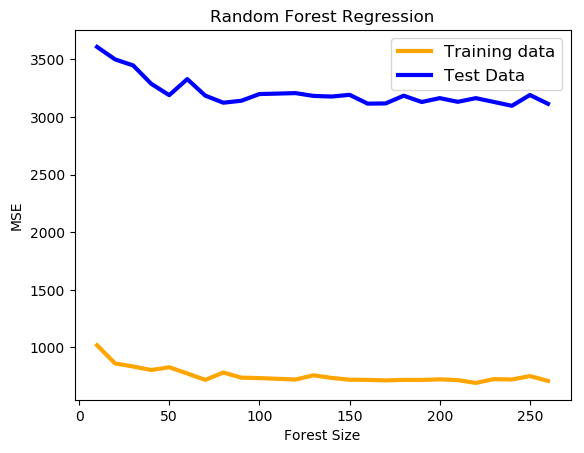

PyObject <matplotlib.legend.Legend object at 0x16beef610>

In [87]:

plot([10,20,30,40,50,60,70,80,90,100,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260], court_forest_stats[:,1].^2, c="orange", label="Training data", linewidth=3)
plot([10,20,30,40,50,60,70,80,90,100,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260], court_forest_stats[:,2].^2, c="b", label="Test Data", linewidth=3)
xlabel("Forest Size")
ylabel("MSE")
title("Random Forest Regression")
legend(prop=Dict("size"=>12))

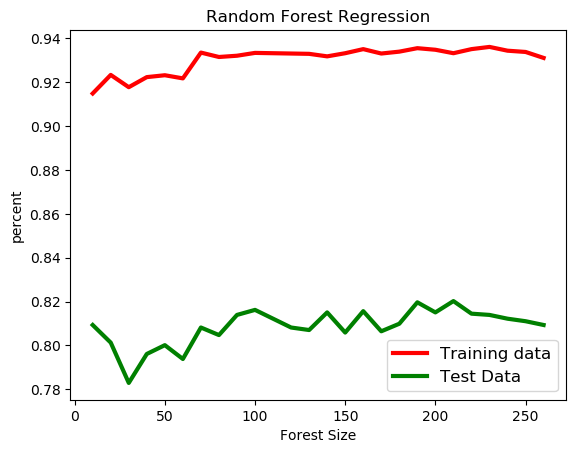

PyObject <matplotlib.legend.Legend object at 0x16c398f10>

In [89]:

plot([10,20,30,40,50,60,70,80,90,100,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260], court_forest_stats[:,3], c="r", label="Training data", linewidth=3)
plot([10,20,30,40,50,60,70,80,90,100,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260], court_forest_stats[:,4], c="g", label="Test Data", linewidth=3)
xlabel("Forest Size")
ylabel("percent")
title("Random Forest Regression")
legend(prop=Dict("size"=>12))